Please upload your Marketing Media Mix dataset (CSV file):


Saving MMM brand data.csv to MMM brand data (1).csv


,Week,Price,Promotion,Sales,TV_Spend,Radio_Spend,Print_Spend,Search_Spend,YouTube_Spend,Social Media_Spend
0,1,14.685360,1,167.481712,2185.430535,3527.163474,3417.156293,4611.101051,3444.378447,2748.516097
1,2,11.036277,0,442.944230,4778.214379,4085.066287,1275.738629,2864.122168,860.146564,3860.360476
2,3,12.078637,1,506.886541,3793.972738,1627.105545,4425.775535,3762.096223,1590.484152,3032.000513
3,4,15.750872,0,270.708355,3193.963179,3311.933448,3259.023076,2462.217341,3981.557059,874.861624
4,5,18.144590,0,116.718348,1202.083882,3072.856924,1207.417476,3335.155599,2879.086342,1335.111066


,0
Price,0
Promotion,0
Sales,0
TV_Spend,0
Radio_Spend,0
Print_Spend,0
Search_Spend,0
YouTube_Spend,0
Social Media_Spend,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     7260.
Date:                Sat, 08 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:20:12   Log-Likelihood:                -15513.
No. Observations:                3000   AIC:                         3.104e+04
Df Residuals:                    2991   BIC:                         3.110e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                678.5705      4.729    143.494      0.000     669.298     687.843
Price                -40.0866      0.180   -222.538      0.000     -40.440     -39.733
Promotion            100.5498      1.676     59.991      0.000      97.263     103.836
TV_Spend               0.0071      0.001     11.981      0.000       0.006       0.008
Radio_Spend            0.0100      0.001     16.619      0.000       0.009       0.011
Print_Spend            0.0082      0.001     13.494      0.000       0.007       0.009
Search_Spend           0.0311      0.001     51.678      0.000       0.030       0.032
YouTube_Spend          0.0086      0.001     14.349      0.000       0.007       0.010
Social Media_Spend     0.0165      0.001     27.346      0.000       0.015       0.018
==============================================================================
Omnibus:                       80.344   Durbin-Watson:                   1.542
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.050
Skew:                          -0.210   Prob(JB):                     5.25e-32
Kurtosis:                       3.988   Cond. No.                     4.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

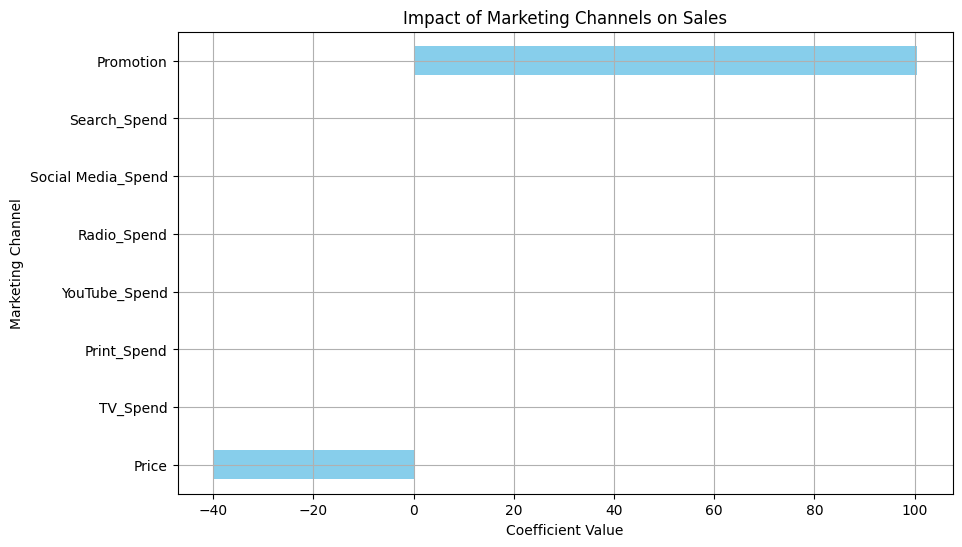

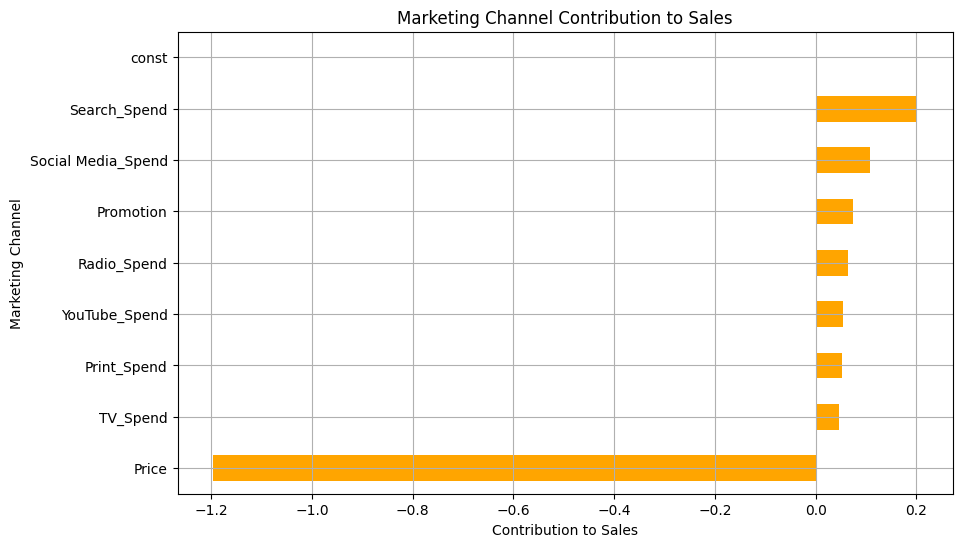

,Price,Promotion,Sales,TV_Spend,Radio_Spend,Print_Spend,Search_Spend,YouTube_Spend,Social Media_Spend
Week,,,,,,,,,
1970-01-01 00:00:00.000000001,14.685360,1,167.481712,2185.430535,3527.163474,3417.156293,4611.101051,3444.378447,2748.516097
1970-01-01 00:00:00.000000002,11.036277,0,442.944230,4778.214379,4085.066287,1275.738629,2864.122168,860.146564,3860.360476
1970-01-01 00:00:00.000000003,12.078637,1,506.886541,3793.972738,1627.105545,4425.775535,3762.096223,1590.484152,3032.000513
1970-01-01 00:00:00.000000004,15.750872,0,270.708355,3193.963179,3311.933448,3259.023076,2462.217341,3981.557059,874.861624
1970-01-01 00:00:00.000000005,18.144590,0,116.718348,1202.083882,3072.856924,1207.417476,3335.155599,2879.086342,1335.111066


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1. Upload and Load the Dataset
# ------------------------------

from google.colab import files
print("Please upload your Marketing Media Mix dataset (CSV file):")
uploaded = files.upload()

# Load the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Display first few rows
display(df.head())

# ------------------------------
# 2. Data Preprocessing (Read Entire Dataset Column by Column)
# ------------------------------

# Convert 'Week' to datetime format if it exists
df_columns = df.columns.tolist()
if 'Week' in df_columns:
    df['Week'] = pd.to_datetime(df['Week'], errors='coerce')
    df.set_index('Week', inplace=True)

# Check for missing values
display(df.isnull().sum())

# Fill missing values with 0
df.fillna(0, inplace=True)

# Automatically select all numeric independent variables except 'Sales'
X = df.drop(columns=['Sales'])
y = df['Sales']

# Add constant for regression
X = sm.add_constant(X)

# ------------------------------
# 3. Marketing Media Mix Model
# ------------------------------

# Fit OLS regression model considering all channels at once
model = sm.OLS(y, X).fit()

# Print regression results
display(model.summary())

# ------------------------------
# 4. Visualizing Results
# ------------------------------

# Plot marketing channel impact on Sales
coefficients = model.params[1:]
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh', color='skyblue')
plt.title('Impact of Marketing Channels on Sales')
plt.xlabel('Coefficient Value')
plt.ylabel('Marketing Channel')
plt.grid()
plt.show()

# ------------------------------
# 5. Contribution Analysis
# ------------------------------

# Calculate spend effectiveness (elasticities)
channel_contributions = (coefficients * X.mean()) / y.mean()

plt.figure(figsize=(10, 6))
channel_contributions.sort_values().plot(kind='barh', color='orange')
plt.title('Marketing Channel Contribution to Sales')
plt.xlabel('Contribution to Sales')
plt.ylabel('Marketing Channel')
plt.grid()
plt.show()

# Show processed data
display(df.head())
